In [1]:
import pandas as pd
import numpy as np
import h5py

In [2]:
window='30x30'
df = pd.read_csv(f'/data/HSC/HSC_v6/step1/g_band_sextractor/{window}_10k_subset/segmented_image_data_v1.csv')

<AxesSubplot:>

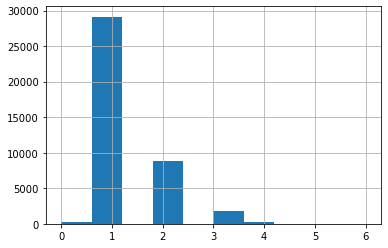

In [3]:
df['NUMBER_IN_CENTER'].hist()

<AxesSubplot:>

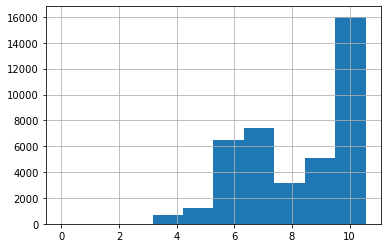

In [4]:
df['PETRO_RADIUS'].hist()

In [5]:
# match up g band mags

In [6]:
mag_path = f'/data/HSC/HSC_v6/step2/127x127/five_band_image127x127_with_metadata.hdf5'
mags_df = pd.DataFrame()
with h5py.File(mag_path, 'r') as hf:
    mags_df['object_id'] = pd.Series(hf['object_id'][:])
    mags_df['g_cmodel_mag'] = pd.Series(hf['g_cmodel_mag'][:])
        

In [7]:
mags_df

,object_id,g_cmodel_mag
0,42278833428106463,20.979572
1,42278695989150320,21.935928
2,41030088866680729,18.288635
3,41117487156191017,22.071690
4,41122709836425861,21.944164
...,...,...
286396,74648752102607194,24.583908
286397,74648752102580829,24.467262
286398,74648477224684554,23.475531
286399,74648618958598412,24.413773


In [8]:
df = pd.merge(df, mags_df, on='object_id')

In [9]:
df.to_csv(f'/data/HSC/HSC_v6/step1/g_band_sextractor/{window}_10k_subset/segmented_mag_data_v1.csv', index=False)